
DP products parameters:    

{'site': 'NPOL', 'scan_type': 'PPI', 'month': '11', 'day': '27', 'year': '2022', 'hh': '19', 'mm': '55', 'ss': '29', 'ref_field_name': 'CZ', 'phi_field_name': 'PH', 'zdr_field_name': 'DR', 'output_cf': True, 'cf_dir': './cf/', 'output_fields': ['DZ', 'CZ', 'VR', 'DR', 'KD', 'PH', 'RH', 'SD', 'FS', 'RC', 'DM', 'NW'], 'output_grid': False, 'grid_dir': './grid/', 'do_HID_summer': True, 'do_HID_winter': False, 'do_mass': True, 'do_RC': True, 'do_tokay_DSD': True, 'dsd_loc': 'wff', 'plot_images': True, 'plot_single': True, 'plot_multi': False, 'max_range': 150, 'max_height': 14, 'sweeps_to_plot': [0], 'fields_to_plot': ['CZ', 'FS', 'RC', 'DM', 'NW'], 'plot_dir': './plots/', 'add_logos': True, 'use_sounding': True, 'sounding_type': 'ruc_archive', 'sounding_dir': './soundings/', 'radar_band': 'S', 'snthresh': -30}

Processing --> ./NPOL_2022_1127_195529_PPI.cf.gz

Renaming radar fields...
dict_keys(['DZ', 'VR', 'DR', 'KD', 'PH', 'RH', 'CZ', 'SD'])


Calculating D

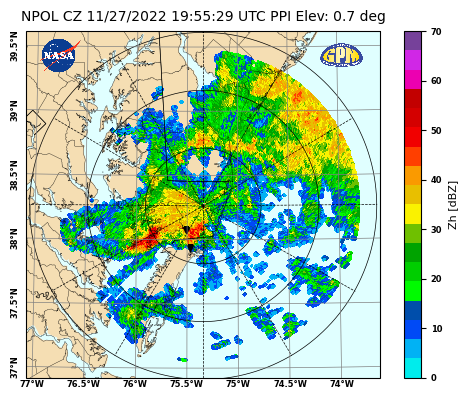

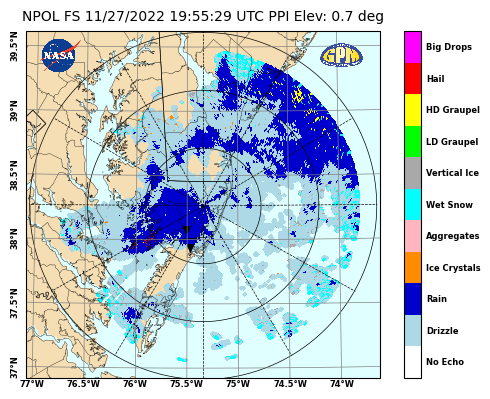

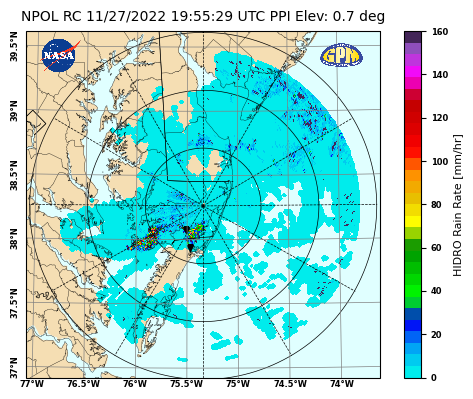

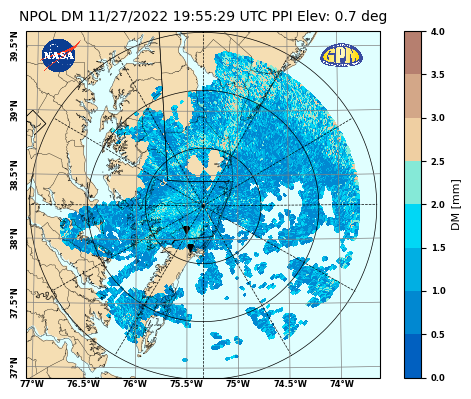

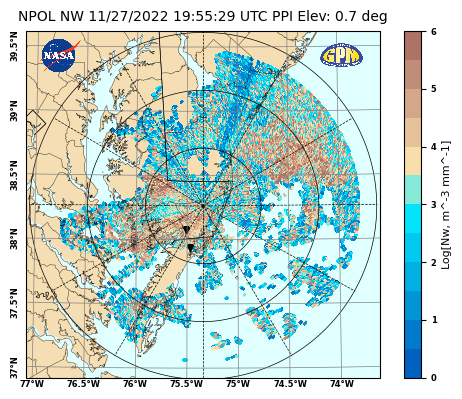

In [3]:
from gvradar import GVradar
import requests
import os

import warnings
warnings.filterwarnings("ignore")

# Read in file
response = requests.get('https://pmm-gv.gsfc.nasa.gov/pub/NPOL/temp/GVradar/cf/NPOL_2022_1127_195529_PPI.cf.gz')
open("./NPOL_2022_1127_195529_PPI.cf.gz", "wb").write(response.content)

file = "./NPOL_2022_1127_195529_PPI.cf.gz"

kwargs_product = get_kwargs()

radar = []
#file = 'QC_radar'
d = GVradar.DP_products(file, radar, **kwargs_product)
d.run_DP_products()

os.remove(file)

In [1]:
def get_kwargs():
    
    kwargs_product = {}
    
    # Select if you want to output a cf file and what fields to write
    kwargs_product.update({'output_cf': True, 'cf_dir': './cf/',
                           'output_fields': ['DZ', 'CZ', 'VR', 'DR', 'KD',
                                             'PH', 'RH', 'SD', 'FS', 'FW',
                                             'RC', 'DM', 'NW', 'SQ']})
    kwargs_product.update({'output_grid': False, 'grid_dir': './grid/',
                           'output_fields': ['DZ', 'CZ', 'VR', 'DR', 'KD',
                                             'PH', 'RH', 'SD', 'FS',
                                             'RC', 'DM', 'NW']})

    # Select which products to produce.
    kwargs_product.update({'do_HID_summer': True,
                           'do_HID_winter': False,
                           'do_mass': True,
                           'do_RC': True,
                           'do_tokay_DSD': True,
                           'dsd_loc': 'wff'})

    # Select plots ranges, type, and fields
    kwargs_product.update({'plot_images': True, 'plot_single': True, 'plot_multi': False,
                           'max_range': 150, 'max_height': 14, 'sweeps_to_plot': [0],
                           'fields_to_plot': ['CZ', 'FS',
                                             'RC', 'DM', 'NW'],
                           'plot_dir': './plots/', 'add_logos': True})

    # A Sounding is needed for DP products, sounding type can be; uwy, ruc, ruc_archive)
    kwargs_product.update({'use_sounding': True, 'sounding_type': 'ruc_archive',
                           'sounding_dir': './soundings/'})

    return kwargs_product
    
    